In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
print("training set dimension: {}, test set dimension: {}"
      .format(X_train_full.shape, X_test.shape))

training set dimension: (60000, 28, 28), test set dimension: (10000, 28, 28)


In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

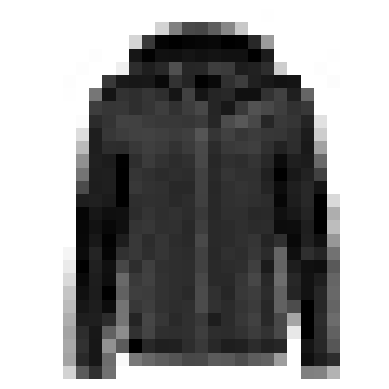

In [4]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

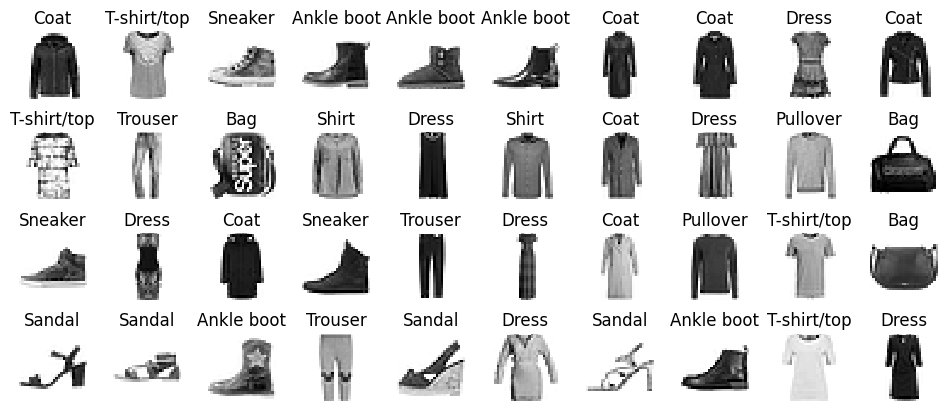

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.layers

/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-24 15:19:10.315537: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-05-24 15:19:10.315567: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-05-24 15:19:10.315573: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-05-24 15:19:10.315604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-24 15:19:10.315613: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow devi

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [9]:
weights, biases = hidden1.get_weights()

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
   1/1719 ━━━━━━━━━━━━━━━━━━━━ 6:27 226ms/step - accuracy: 0.2812 - loss: 2.2856

2025-05-24 15:19:10.722816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6811 - loss: 0.9585 - val_accuracy: 0.8188 - val_loss: 0.5259
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8155 - loss: 0.5282 - val_accuracy: 0.8348 - val_loss: 0.4861
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8333 - loss: 0.4778 - val_accuracy: 0.8456 - val_loss: 0.4530
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8413 - loss: 0.4579 - val_accuracy: 0.8498 - val_loss: 0.4380
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8429 - loss: 0.4475 - val_accuracy: 0.8514 - val_loss: 0.4408
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8480 - loss: 0.4351 - val_accuracy: 0.8554 - val_loss: 0.4257
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8508 - loss: 0.4289 - val_accuracy: 0.8482 - val_loss: 0.4365
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8533 - loss: 0.4281 - val_accurac

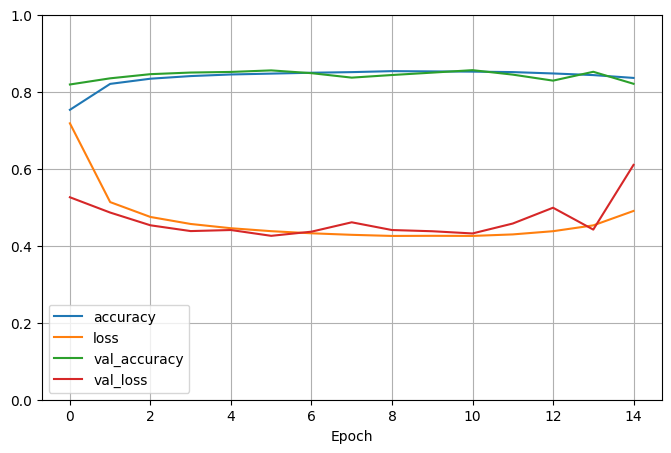

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), ylim=[0, 1], grid=True, xlabel="Epoch")
plt.legend(loc="lower left")  # extra code
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.6272


[0.6423141360282898, 0.803600013256073]

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.11, 0.01, 0.77],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [17]:
model.predict(X_new).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(3, 10)

In [14]:
tf.keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")


<Dense name=dense_3, built=False>

In [15]:
[name for name in dir(tf.keras.initializers) if not name.startswith("_")]



['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'STFT',
 'STFTInitializer',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'stft',
 'truncated_normal',
 'variance_scaling',
 'zeros']

**RNN**

In [18]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
HS = pdr.get_data_fred('HSN1FNSA', datetime(1963,1,1),datetime(2023,1,1))

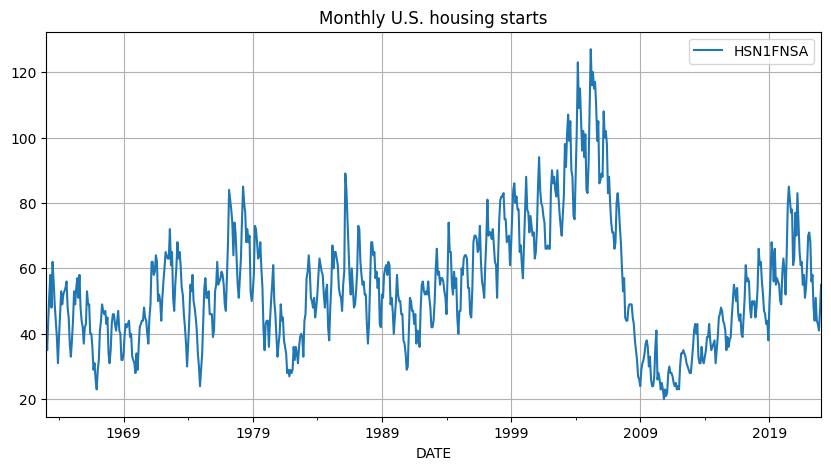

In [19]:
HS.plot(figsize=(10,5))
plt.title("Monthly U.S. housing starts")
plt.grid(True)
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA

HS = HS.asfreq("MS")
HS_airline = ARIMA(HS, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
HS_airline = HS_airline.fit()
HS_airline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                         HSN1FNSA   No. Observations:                  721
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2120.205
Date:                          Sun, 25 May 2025   AIC                           4246.410
Time:                                  00:12:58   BIC                           4260.098
Sample:                              01-01-1963   HQIC                          4251.699
                                   - 01-01-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1841      0.032     -5.809      0.000      -0.246      -0.122
ma.S.L12      -0.8727      0.021    -41.937      0.000      -0.914      -0.832
sigma2        22.8066      1.080     21.121      0.000      20.690      24.923
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                10.74
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
model = ARIMA(HS["1963-01-01":"1999-12-01"],  # train on data up to "today"
                  order=(0, 1, 1),
                  seasonal_order=(0, 1, 1, 12))
model = model.fit()
model.forecast(12)

2000-01-01    63.374995
2000-02-01    70.134122
2000-03-01    79.586313
2000-04-01    78.124036
2000-05-01    77.052749
2000-06-01    75.473344
2000-07-01    72.708629
2000-08-01    74.381801
2000-09-01    68.222909
2000-10-01    67.498026
2000-11-01    62.196598
2000-12-01    58.089668
Freq: MS, Name: predicted_mean, dtype: float64

In [23]:
dHS = HS.diff().dropna()
origin, start_date, end_date = "1963-01-01", "2000-01-01", "2023-01-01"
time_period = pd.date_range(start_date, end_date, freq="MS")
HS_series = dHS.loc[origin:end_date]
y_preds = []
for today in time_period.shift(-1):
    model = ARIMA(HS_series[origin:today],  # train on data up to "today"
                  order=(0, 0, 1),
                  seasonal_order=(0, 1, 1, 12))
    model = model.fit()  # note that we retrain the model every day!
    y_pred = model.forecast(12)
    y_preds.extend(y_pred)

In [24]:
dHS = HS.diff().dropna()
origin, start_date, end_date = "1963-01-01", "2000-01-01", "2023-01-01"
time_period = pd.date_range(start_date, end_date, freq="MS")
HS_series = dHS.loc[origin:end_date]
y_preds = []
for today in time_period.shift(-1):
    model = ARIMA(HS_series[origin:today],  # train on data up to "today"
                  order=(0, 0, 1),
                  seasonal_order=(0, 1, 1, 12))
    model = model.fit()  # note that we retrain the model every day!
    y_pred = model.forecast(12)
    y_preds.extend(y_pred)

In [25]:
y_preds = np.array(y_preds).reshape(-1, 12)
y_true = HS_series.loc[time_period].values.ravel()
air_rmse = []
for i in range(12):
    if i == 0:
        rmse_i = np.sqrt(((y_preds[:, i]- y_true[i:])**2).mean())
    else:
        rmse_i = np.sqrt(((y_preds[:-i, i]- y_true[i:])**2).mean())
    air_rmse.append(rmse_i)

air_rmse = np.array(air_rmse)
air_rmse

array([5.32990421, 5.41620788, 5.42114653, 5.4301962 , 5.41385677,
       5.4210573 , 5.42535385, 5.41610261, 5.41812681, 5.42395949,
       5.43276766, 5.44084109])

In [26]:
rmse = pd.DataFrame(data=air_rmse, index=range(1, len(air_rmse)+1, 1),
                    columns=["airline_rmse"], dtype=float)

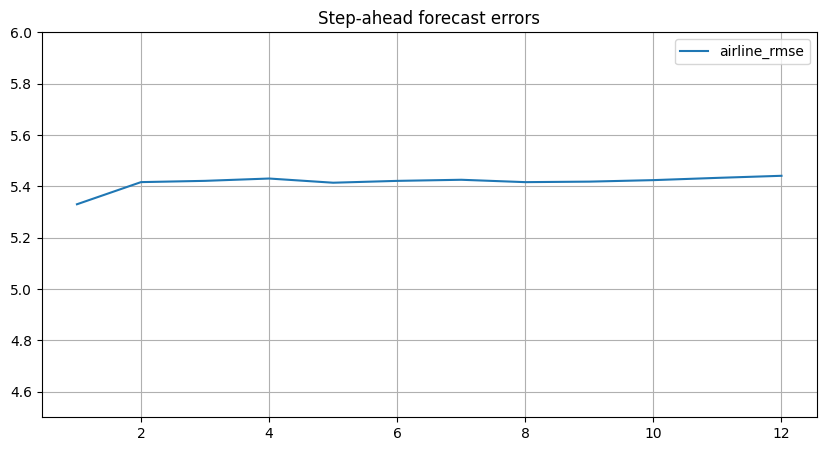

In [27]:
rmse.plot(figsize=(10,5))
plt.title("Step-ahead forecast errors")
plt.grid(True)
plt.ylim(4.5,6)
plt.show()

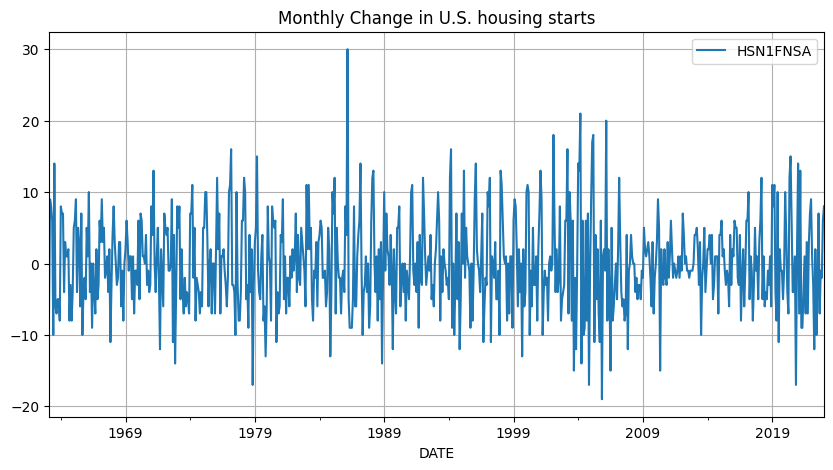

In [28]:
dHS.plot(figsize=(10,5))
plt.title("Monthly Change in U.S. housing starts")
plt.grid(True)
plt.show()

In [29]:
def ts_split(ts, feature_steps=24, target_steps=1):
    n_obs = len(ts) - feature_steps - target_steps + 1
    X = np.array([ts[idx:idx + feature_steps] for idx in range(n_obs)])
    y = np.array([ts[idx + feature_steps:idx + feature_steps + target_steps]
                  for idx in range(n_obs)])
    return X, y

In [30]:
ts = dHS.values.flatten()
X, y = ts_split(ts)

In [31]:
valid_idx = sum(dHS.index < pd.Timestamp(2000,1,1)) - 24
valid_idx


419

In [32]:
X_train_full, y_train_full = X[:valid_idx], y[:valid_idx]
X_test, y_test = X[valid_idx:], y[valid_idx:]

In [33]:
valid_idx*.75


314.25

In [34]:
train_idx = 314
X_train, y_train = X_train_full[:train_idx], y_train_full[:train_idx]
X_valid, y_valid = X_train_full[train_idx:], y_train_full[train_idx:]

In [39]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

In [40]:
reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[24]),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="nadam")

/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  min_delta=0.01,
                                                  restore_best_weights=True)
run = model.fit(X_train, y_train, epochs=400,
                validation_data=(X_valid, y_valid),
                callbacks=[early_stopping_cb], verbose=0)
pd.DataFrame(run.history).iloc[-11:]

,loss,val_loss
157,20.043379,21.179216
158,20.037998,21.177908
159,20.032818,21.176735
160,20.027828,21.175684
161,20.023027,21.174751
162,20.018402,21.173927
163,20.013954,21.173210
164,20.009670,21.172586
165,20.005548,21.172054
166,20.001579,21.171610


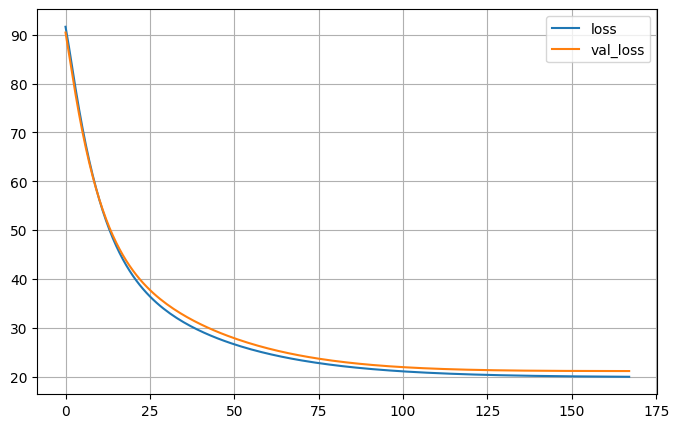

In [42]:
pd.DataFrame(run.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [43]:
ypred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, ypred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


5.382335407171985

In [44]:
X_12ahead, y_12ahead = ts_split(ts, feature_steps=24, target_steps=12)
X_train_12ahead = X_12ahead[:train_idx]
y_train_12ahead = y_12ahead[:train_idx]
X_valid_12ahead = X_12ahead[train_idx:valid_idx]
y_valid_12ahead = y_12ahead[train_idx:valid_idx]
X_test_12ahead = X_12ahead[valid_idx:]
y_test_12ahead = y_12ahead[valid_idx:]

In [45]:
reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[24]),
    tf.keras.layers.Dense(12)
])

model.compile(loss="mse", optimizer="nadam")

/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  min_delta=0.01,
                                                  restore_best_weights=True)
run = model.fit(X_train_12ahead, y_train_12ahead, epochs=200,
                validation_data=(X_valid_12ahead, y_valid_12ahead),
                callbacks=[early_stopping_cb], verbose=0)
pd.DataFrame(run.history).iloc[-11:]

,loss,val_loss
189,19.995789,24.591190
190,19.994373,24.589481
191,19.993000,24.587820
192,19.991674,24.586206
193,19.990391,24.584639
194,19.989147,24.583105
195,19.987944,24.581617
196,19.986782,24.580172
197,19.985657,24.578760
198,19.984568,24.577389


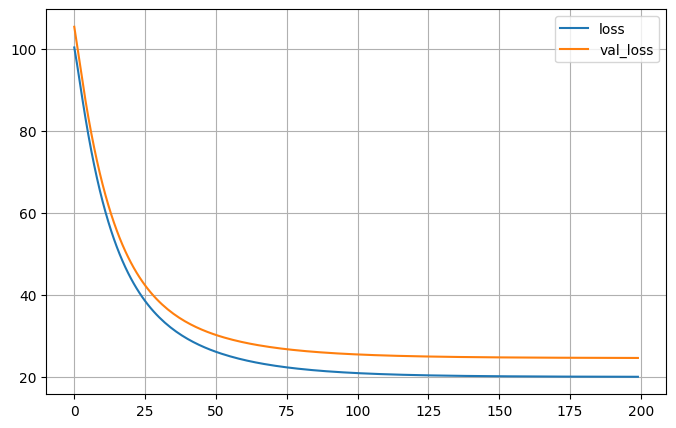

In [47]:
pd.DataFrame(run.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [48]:
ypred = model.predict(X_test_12ahead)
rmse_12ahead = np.sqrt(mean_squared_error(y_test_12ahead, ypred,
                                          multioutput="raw_values"))
rmse_12ahead

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([5.35757182, 5.37766987, 5.43137706, 5.47402185, 5.57743204,
       5.52324089, 5.50603154, 5.43089646, 5.32523541, 5.27886032,
       5.26733471, 5.2928678 ])

In [49]:
rmse["linear"] = rmse_12ahead
rmse

,airline_rmse,linear
1,5.329904,5.357572
2,5.416208,5.377670
3,5.421147,5.431377
4,5.430196,5.474022
5,5.413857,5.577432
6,5.421057,5.523241
7,5.425354,5.506032
8,5.416103,5.430896
9,5.418127,5.325235
10,5.423959,5.278860


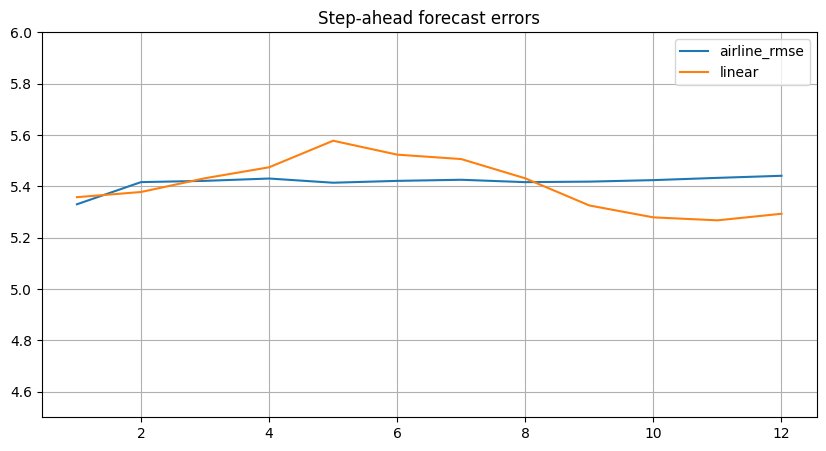

In [50]:
rmse.plot(figsize=(10,5))
plt.title("Step-ahead forecast errors")
plt.grid(True)
plt.ylim(4.5,6)
plt.show()

In [51]:
reset_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None,1])
])

model.compile(loss="mse", optimizer="nadam")

/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=200,
                                                  min_delta=0.01,
                                                  restore_best_weights=True)
run = model.fit(X_train[..., np.newaxis], y_train, epochs=200,
                validation_data=(X_valid[..., np.newaxis], y_valid),
                callbacks=[early_stopping_cb])
pd.DataFrame(run.history).iloc[-11:]

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 36.4950 - val_loss: 39.5587
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 36.4931 - val_loss: 39.5546
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 36.4918 - val_loss: 39.5501
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 36.4906 - val_loss: 39.5454
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 36.4895 - val_loss: 39.5407
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 36.4884 - val_loss: 39.5359
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 36.4874 - val_loss: 39.5312
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - loss: 36.4863 - val_loss: 39.5264
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 36.4853 - val_loss: 39.5217
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 36.4843 - val_loss: 39.5169
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 36.4833 - val_loss: 39.5121
Epoch 12/200
10/10 

,loss,val_loss
189,36.401821,37.878719
190,36.400993,37.877884
191,36.400185,37.877094
192,36.399368,37.876354
193,36.398571,37.875656
194,36.397778,37.874996
195,36.396996,37.874378
196,36.396221,37.873795
197,36.395447,37.873241
198,36.394688,37.872715


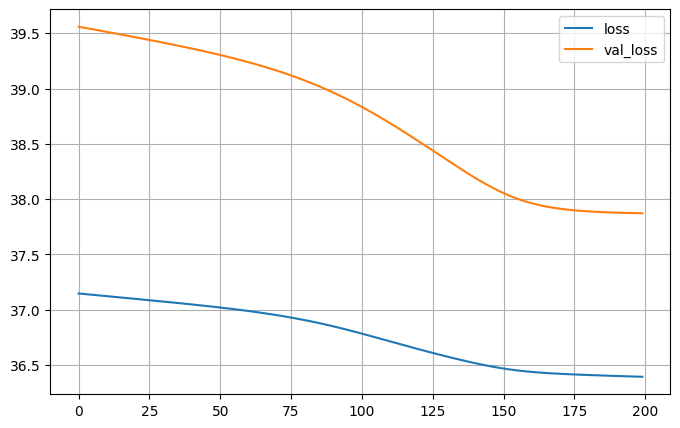

In [53]:
pd.DataFrame(run.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()